In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

In [42]:
!mkdir -p
!wget -O cstr_rawdata.npy https://github.com/dradhika0307/CL653_project_radhika_210107067/raw/main/cstr_rawdata.npy

mkdir: missing operand
Try 'mkdir --help' for more information.
--2024-04-24 14:07:19--  https://github.com/dradhika0307/CL653_project_radhika_210107067/raw/main/cstr_rawdata.npy
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dradhika0307/CL653_project_radhika_210107067/main/cstr_rawdata.npy [following]
--2024-04-24 14:07:19--  https://raw.githubusercontent.com/dradhika0307/CL653_project_radhika_210107067/main/cstr_rawdata.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32123648 (31M) [application/octet-stream]
Saving to: ‘cstr_rawdata.npy’

cstr_rawdata.npy    100%[===================>]  3

In [43]:
import numpy as np

# Load the data into a variable with allow_pickle=True
rd = np.load('cstr_rawdata.npy', allow_pickle=True)

# Check the shape of the loaded array
print("Loaded array shape:", rd.shape)


Loaded array shape: (2860, 1404)


In [44]:
column_names = [f"Column_{i}" for i in range(rd.shape[1])]

# Display column names
print("\nColumn Names:")
print(column_names)

# Display the first few rows of the array
num_rows_to_display = 5  # Adjust as needed
print(f"\nFirst {num_rows_to_display} Rows:")
print(rd[:num_rows_to_display, :])


Column Names:
['Column_0', 'Column_1', 'Column_2', 'Column_3', 'Column_4', 'Column_5', 'Column_6', 'Column_7', 'Column_8', 'Column_9', 'Column_10', 'Column_11', 'Column_12', 'Column_13', 'Column_14', 'Column_15', 'Column_16', 'Column_17', 'Column_18', 'Column_19', 'Column_20', 'Column_21', 'Column_22', 'Column_23', 'Column_24', 'Column_25', 'Column_26', 'Column_27', 'Column_28', 'Column_29', 'Column_30', 'Column_31', 'Column_32', 'Column_33', 'Column_34', 'Column_35', 'Column_36', 'Column_37', 'Column_38', 'Column_39', 'Column_40', 'Column_41', 'Column_42', 'Column_43', 'Column_44', 'Column_45', 'Column_46', 'Column_47', 'Column_48', 'Column_49', 'Column_50', 'Column_51', 'Column_52', 'Column_53', 'Column_54', 'Column_55', 'Column_56', 'Column_57', 'Column_58', 'Column_59', 'Column_60', 'Column_61', 'Column_62', 'Column_63', 'Column_64', 'Column_65', 'Column_66', 'Column_67', 'Column_68', 'Column_69', 'Column_70', 'Column_71', 'Column_72', 'Column_73', 'Column_74', 'Column_75', 'Colum

In [45]:
mask = np.isnan(rd)

# Use np.logical_not() to invert the mask, keeping non-NaN values
rd_cleaned = rd[np.logical_not(mask).any(axis=1)]

print("Array shape after dropping rows with NaN values:", rd_cleaned.shape)

Array shape after dropping rows with NaN values: (2860, 1404)


In [46]:
dataset = rd.copy()

In [47]:
# Extracting features and labels
X = dataset[:, :-4]
class_label = dataset[:, -4]
domain_label = dataset[:, -3]
parameter_noise = dataset[:, -2]
reaction_order = dataset[:, -1]

In [48]:
# Exploring unique values in labels
np.unique(domain_label, return_counts=True)


(array([0., 1., 2., 3., 4., 5., 6.]),
 array([1300,  260,  260,  260,  260,  260,  260]))

There are 1300 (100x per fault + 100x for normal operation) samples in the source domain (i.e. reaction order  
N
=
1
  and parameter noise  
ϵ
=
0.0
 ). Next, we explore the other domains.

In [49]:
np.unique(reaction_order, return_counts=True)

(array([0.5, 1. , 1.5, 2. ]), array([ 260, 2080,  260,  260]))

There are 4 types of reaction order: 0.5, 1.0, 1.5, and 2.0. This corresponds to the velocity of the reaction  
A
→
B
 . Each target domain (i.e., a specific combination of  
N
  and parameter noise  
ϵ
 ) has 260 samples (20x samples for each fault + 20x samples for normal operation). There are 4 domains with  
N
=
1
 , i.e., the source domain (which has  
N
=
1.0
  and  
ϵ
=
0.0
 ), and  
N
=
1.0
  with  
ϵ
∈
{
0.1
,
0.15
,
0.2
}
 .

In [50]:
np.unique(parameter_noise, return_counts=True)

(array([0.  , 0.1 , 0.15, 0.2 ]), array([1300,  260, 1040,  260]))

we now list the combination  
(
N
,
ϵ
)
  for each domain label,

In [51]:
# Print domain label, reaction order, and parameter noise details
print('-' * 49)
print("|{:^15}|{:^15}|{:^15}|".format('Domain Label', "N", "Noise(ϵ)"))
print('-' * 49)
for domain in np.unique(domain_label):
    ind = np.where(domain_label == domain)[0]
    print("|{:^15}|{:^15}|{:^15}|".format(domain, np.unique(reaction_order[ind]).item(), np.unique(parameter_noise[ind]).item()))
print('-' * 49)

-------------------------------------------------
| Domain Label  |       N       |   Noise(ϵ)    |
-------------------------------------------------
|      0.0      |      1.0      |      0.0      |
|      1.0      |      1.0      |      0.1      |
|      2.0      |      1.0      |     0.15      |
|      3.0      |      1.0      |      0.2      |
|      4.0      |      0.5      |     0.15      |
|      5.0      |      1.5      |     0.15      |
|      6.0      |      2.0      |     0.15      |
-------------------------------------------------


In [52]:
# Select samples for a specific domain label (e.g., domain_label = 0)
ind_s = np.where(domain_label == 0)[0]
Xs = X[ind_s]
ys = class_label[ind_s]

In [53]:
# Normalize the data (using z-score normalization)
scaler = StandardScaler()
Xs = scaler.fit_transform(Xs)

In [54]:
Xs.shape

(1300, 1400)

we can now investigate the signals in  
Xs
 . Let us show a few variables for the normal operation,

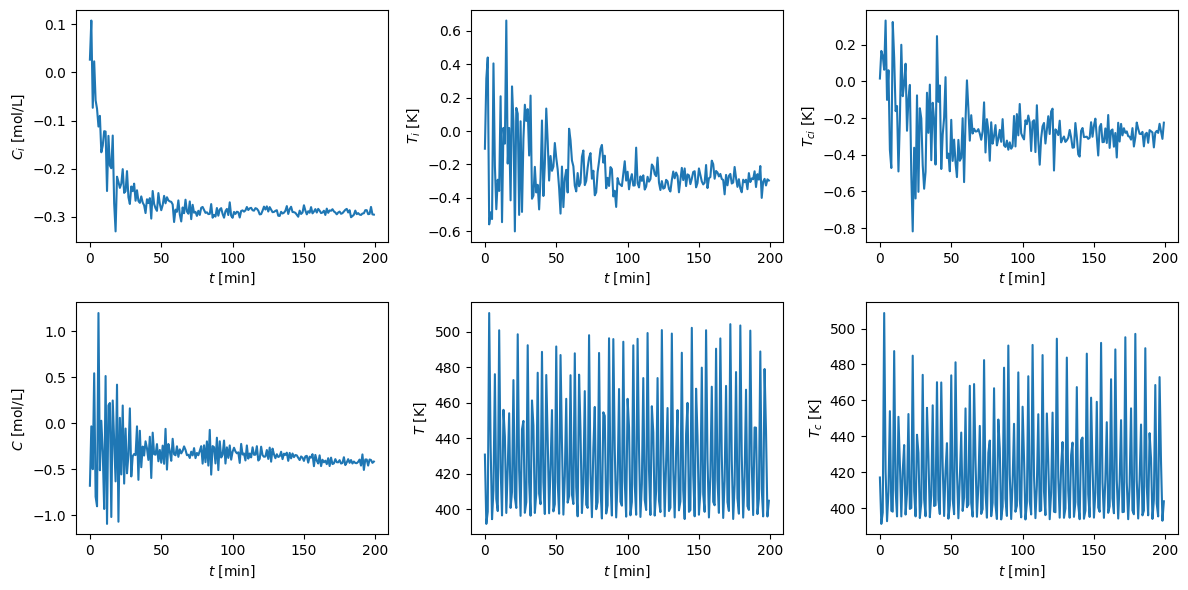

In [55]:
fig, axes = plt.subplots(2, 3, figsize=(12, 6))

t = np.arange(0, 200, 1)

axes[0, 0].plot(t, Xs[-1, :200])
axes[0, 0].set_ylabel('$C_{i}$ [mol/L]')
axes[0, 0].set_xlabel('$t$ [min]')

axes[0, 1].plot(t, Xs[-1, 200:400])
axes[0, 1].set_ylabel('$T_{i}$ [K]')
axes[0, 1].set_xlabel('$t$ [min]')

axes[0, 2].plot(t, Xs[-1, 400:600])
axes[0, 2].set_ylabel('$T_{ci}$ [K]')
axes[0, 2].set_xlabel('$t$ [min]')

axes[1, 0].plot(t, Xs[-1, 600: 800])
axes[1, 0].set_ylabel('$C$ [mol/L]')
axes[1, 0].set_xlabel('$t$ [min]')

axes[1, 1].plot(t, X[-1, 800: 1000])
axes[1, 1].set_ylabel('$T$ [K]')
axes[1, 1].set_xlabel('$t$ [min]')

axes[1, 2].plot(t, X[-1, 1000: 1200])
axes[1, 2].set_ylabel('$T_{c}$ [K]')
axes[1, 2].set_xlabel('$t$ [min]')

plt.tight_layout()

now, for fault 1,

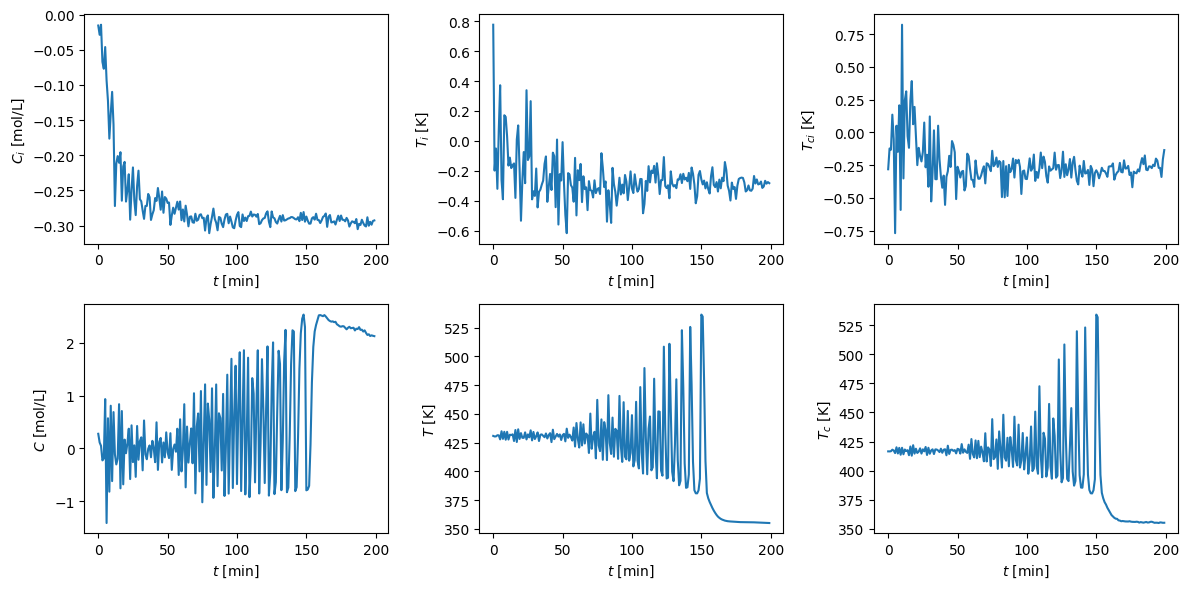

In [56]:
fig, axes = plt.subplots(2, 3, figsize=(12, 6))

t = np.arange(0, 200, 1)

axes[0, 0].plot(t, Xs[0, :200])
axes[0, 0].set_ylabel('$C_{i}$ [mol/L]')
axes[0, 0].set_xlabel('$t$ [min]')

axes[0, 1].plot(t, Xs[0, 200:400])
axes[0, 1].set_ylabel('$T_{i}$ [K]')
axes[0, 1].set_xlabel('$t$ [min]')

axes[0, 2].plot(t, Xs[0, 400:600])
axes[0, 2].set_ylabel('$T_{ci}$ [K]')
axes[0, 2].set_xlabel('$t$ [min]')

axes[1, 0].plot(t, Xs[0, 600: 800])
axes[1, 0].set_ylabel('$C$ [mol/L]')
axes[1, 0].set_xlabel('$t$ [min]')

axes[1, 1].plot(t, X[0, 800: 1000])
axes[1, 1].set_ylabel('$T$ [K]')
axes[1, 1].set_xlabel('$t$ [min]')

axes[1, 2].plot(t, X[0, 1000: 1200])
axes[1, 2].set_ylabel('$T_{c}$ [K]')
axes[1, 2].set_xlabel('$t$ [min]')

plt.tight_layout()

as you may see, the signals are quite different. Also, their range is different. We thus need to normalize them before applying t-SNE. We normalize each variable independently,

In [57]:
signals = [Xs[:, i * 200: (i + 1) * 200] for i in range(7)]

for signal in signals:
    print(signal.shape)

(1300, 200)
(1300, 200)
(1300, 200)
(1300, 200)
(1300, 200)
(1300, 200)
(1300, 200)


In [58]:
for i in range(len(signals)):
    μ, σ = signals[i].mean(), signals[i].std()

    signals[i] = (signals[i] - μ) / σ
Xs = np.concatenate(signals, axis=1)

(-52.583522415161134,
 43.98344764709473,
 -54.460906410217284,
 50.93907489776611)

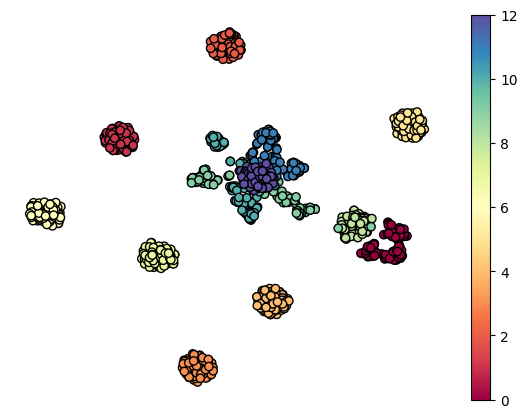

In [59]:
tsne = TSNE(n_components=2)
proj = tsne.fit_transform(Xs)
plt.figure(figsize=(7, 5))
sca = plt.scatter(proj[:, 0], proj[:, 1], c=ys, cmap=plt.get_cmap('Spectral'), edgecolor='k')
plt.colorbar(sca)
plt.axis('off')

We apply the same preprocessing steps for the target domain data.

In [60]:
Xt, yt = [], []
for domain in np.unique(domain_label).astype(int)[1:]:
    ind_t = np.where(domain_label == domain)[0]
    Xtk = X[ind_t]
    ytk = class_label[ind_t]
    signals = [Xtk[:, i * 200: (i + 1) * 200] for i in range(7)]

    for i in range(len(signals)):
        μ, σ = signals[i].mean(), signals[i].std()

        signals[i] = (signals[i] - μ) / σ
    Xtk = np.concatenate(signals, axis=1)
    Xt.append(Xtk)
    yt.append(ytk)

(-62.16662673950195, 66.38959579467773, -69.79485530853272, 70.12235088348389)

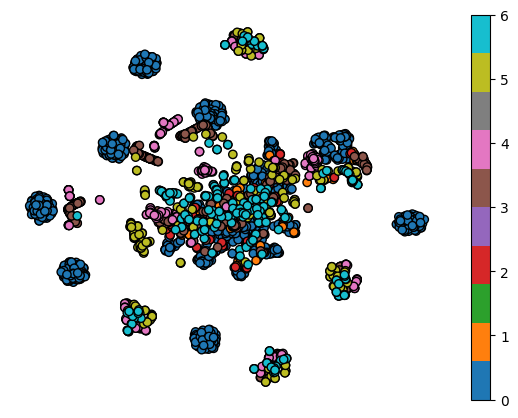

In [61]:
all_features = np.concatenate([Xs] + Xt, axis=0)
all_labels = np.concatenate([ys] + yt, axis=0)
proj = tsne.fit_transform(all_features)
plt.figure(figsize=(7, 5))
sca = plt.scatter(proj[:, 0], proj[:, 1], c=domain_label, cmap=plt.get_cmap('tab10'), edgecolor='k')
plt.colorbar(sca)
plt.axis('off')

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [63]:
X_train, X_test, y_train, y_test = train_test_split(Xs, ys, test_size=0.2, random_state=67)

In [64]:
# Instantiate and fit a scaler on your training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Instantiate Logistic Regression with an increased max_iter
model = LogisticRegression(random_state=67, max_iter=1000,solver='saga')  # Increase max_iter as needed

# Fit the model on scaled training data
model.fit(X_train_scaled, y_train)

# Predict on scaled test data
y_pred = model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.75

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        26
         1.0       1.00      1.00      1.00        17
         2.0       1.00      1.00      1.00        23
         3.0       1.00      1.00      1.00        20
         4.0       1.00      1.00      1.00        17
         5.0       1.00      1.00      1.00        19
         6.0       1.00      1.00      1.00        16
         7.0       1.00      1.00      1.00        17
         8.0       1.00      1.00      1.00        16
         9.0       0.20      0.24      0.22        17
        10.0       0.43      0.20      0.27        30
        11.0       0.20      0.29      0.24        21
        12.0       0.28      0.33      0.30        21

    accuracy                           0.75       260
   macro avg       0.78      0.77      0.77       260
weighted avg       0.76      0.75      0.75       260


Confusion Matrix:
[[26  0  0  0  0  0  

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [65]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=0.95)  # Keep 95% of the variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Instantiate Logistic Regression with an increased max_iter
model_pca = LogisticRegression(random_state=67, max_iter=1000,solver='saga')

# Fit the model on PCA-transformed training data
model_pca.fit(X_train_pca, y_train)

# Predict on PCA-transformed test data
y_pred_pca = model_pca.predict(X_test_pca)

# Calculate accuracy
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print(f"Accuracy with PCA: {accuracy_pca:.2f}")

# Print classification report and confusion matrix with PCA
print("\nClassification Report with PCA:")
print(classification_report(y_test, y_pred_pca))

print("\nConfusion Matrix with PCA:")
print(confusion_matrix(y_test, y_pred_pca))


Accuracy with PCA: 0.73

Classification Report with PCA:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        26
         1.0       1.00      1.00      1.00        17
         2.0       1.00      1.00      1.00        23
         3.0       1.00      1.00      1.00        20
         4.0       1.00      1.00      1.00        17
         5.0       1.00      1.00      1.00        19
         6.0       1.00      1.00      1.00        16
         7.0       1.00      1.00      1.00        17
         8.0       1.00      1.00      1.00        16
         9.0       0.20      0.29      0.24        17
        10.0       0.45      0.17      0.24        30
        11.0       0.10      0.14      0.12        21
        12.0       0.29      0.33      0.31        21

    accuracy                           0.73       260
   macro avg       0.77      0.76      0.76       260
weighted avg       0.76      0.73      0.74       260


Confusion Matrix with

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [66]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiate KNN Classifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

# Predict with KNN Classifier
y_pred_knn = knn_model.predict(X_test_scaled)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn:.2f}")

# Print classification report and confusion matrix for KNN
print("\nKNN Classification Report:")
print(classification_report(y_test, y_pred_knn))

print("\nKNN Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))


KNN Accuracy: 0.93

KNN Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        26
         1.0       1.00      1.00      1.00        17
         2.0       1.00      1.00      1.00        23
         3.0       1.00      1.00      1.00        20
         4.0       1.00      1.00      1.00        17
         5.0       1.00      1.00      1.00        19
         6.0       1.00      1.00      1.00        16
         7.0       1.00      1.00      1.00        17
         8.0       1.00      1.00      1.00        16
         9.0       1.00      0.82      0.90        17
        10.0       1.00      0.77      0.87        30
        11.0       1.00      0.62      0.76        21
        12.0       0.54      1.00      0.70        21

    accuracy                           0.93       260
   macro avg       0.96      0.94      0.94       260
weighted avg       0.96      0.93      0.94       260


KNN Confusion Matrix:
[[26  0  

KNN Accuracy: 0.98

KNN Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       102
           1       0.97      1.00      0.98        98

    accuracy                           0.98       200
   macro avg       0.99      0.99      0.98       200
weighted avg       0.99      0.98      0.99       200


KNN Confusion Matrix:
[[99  3]
 [ 0 98]]


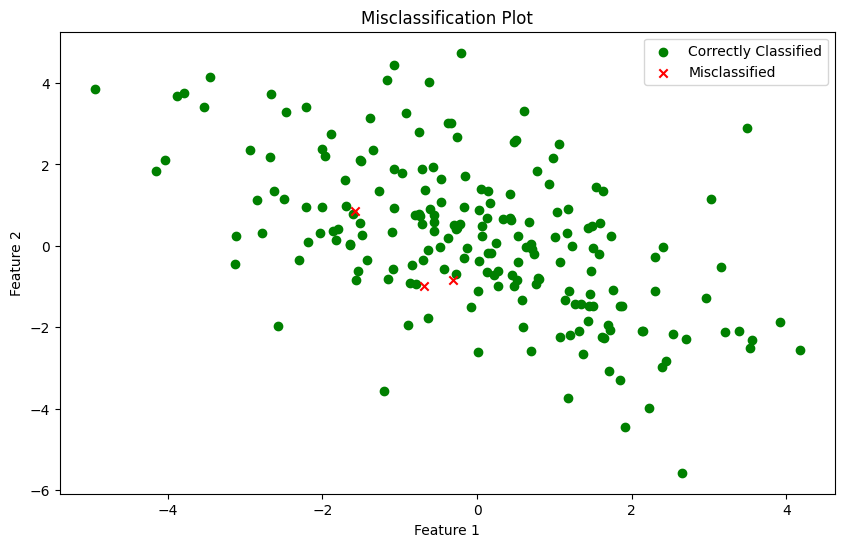

In [67]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Generate a synthetic dataset for example purposes
X, y = make_classification(n_samples=1000, n_features=10, n_informative=8, n_clusters_per_class=1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Instantiate KNN Classifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

# Predict with KNN Classifier
y_pred_knn = knn_model.predict(X_test_scaled)

# Calculate accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn:.2f}")

# Print classification report and confusion matrix for KNN
print("\nKNN Classification Report:")
print(classification_report(y_test, y_pred_knn))

print("\nKNN Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))

# Create a misclassification plot
misclassified_points = X_test[y_test != y_pred_knn]
correctly_classified_points = X_test[y_test == y_pred_knn]

plt.figure(figsize=(10, 6))
plt.scatter(correctly_classified_points[:, 0], correctly_classified_points[:, 1], c='green', marker='o', label='Correctly Classified')
plt.scatter(misclassified_points[:, 0], misclassified_points[:, 1], c='red', marker='x', label='Misclassified')
plt.title('Misclassification Plot')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


In [72]:
from sklearn.svm import SVC

# Instantiate SVM Classifier
svm_model = SVC(kernel='rbf', random_state=67)
svm_model.fit(X_train_scaled, y_train)

# Predict with SVM Classifier
y_pred_svm = svm_model.predict(X_test_scaled)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm:.2f}")

# Print classification report and confusion matrix for SVM
print("\nSVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

print("\nSVM Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))


SVM Accuracy: 0.98

SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       102
           1       0.97      1.00      0.98        98

    accuracy                           0.98       200
   macro avg       0.99      0.99      0.98       200
weighted avg       0.99      0.98      0.99       200


SVM Confusion Matrix:
[[99  3]
 [ 0 98]]


Random Forest Accuracy: 0.96

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       102
           1       0.95      0.98      0.96        98

    accuracy                           0.96       200
   macro avg       0.97      0.97      0.96       200
weighted avg       0.97      0.96      0.97       200


Random Forest Confusion Matrix:
[[97  5]
 [ 2 96]]


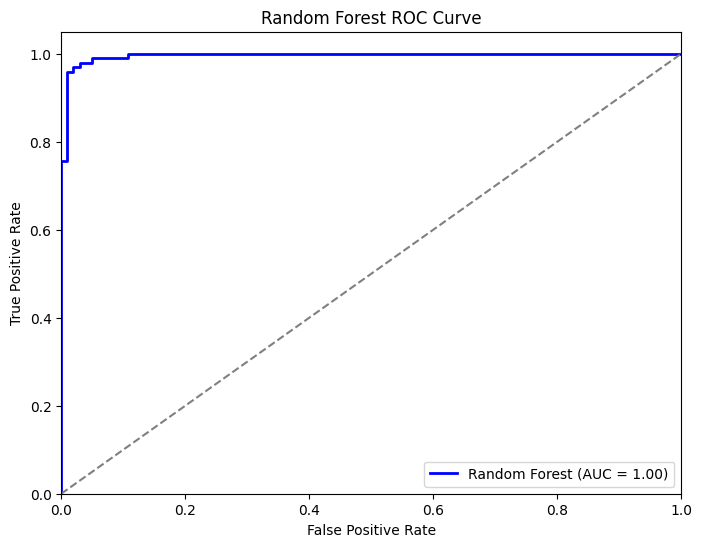

In [69]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_curve, auc, accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Instantiate Random Forest Classifier with reduced estimators and max depth
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=67)
rf_model.fit(X_train_scaled, y_train)

# Predict with Random Forest Classifier
y_pred_rf = rf_model.predict(X_test_scaled)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")

# Print classification report and confusion matrix for Random Forest
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("\nRandom Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

# Random Forest ROC Curve and AUC
y_probs_rf = rf_model.predict_proba(X_test_scaled)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_probs_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot Random Forest ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend(loc='lower right')
plt.show()


Gradient Boosting Accuracy: 0.97

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       102
           1       0.95      0.99      0.97        98

    accuracy                           0.97       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200


Gradient Boosting Confusion Matrix:
[[97  5]
 [ 1 97]]


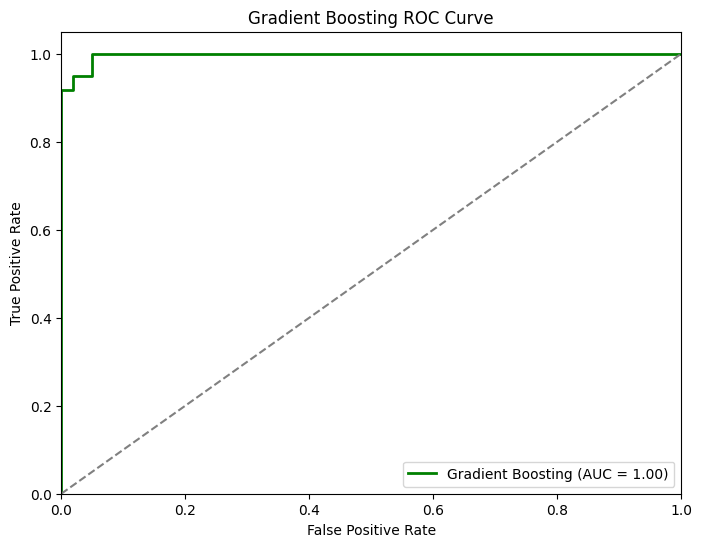

In [70]:
# Instantiate Gradient Boosting Classifier with reduced estimators and max depth
gb_model = GradientBoostingClassifier(n_estimators=100, max_depth=3, random_state=67)
gb_model.fit(X_train_scaled, y_train)

# Predict with Gradient Boosting Classifier
y_pred_gb = gb_model.predict(X_test_scaled)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"\nGradient Boosting Accuracy: {accuracy_gb:.2f}")

# Print classification report and confusion matrix for Gradient Boosting
print("\nGradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb))

print("\nGradient Boosting Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gb))

# Gradient Boosting ROC Curve and AUC
y_probs_gb = gb_model.predict_proba(X_test_scaled)[:, 1]
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_probs_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)

# Plot Gradient Boosting ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_gb, tpr_gb, color='green', lw=2, label=f'Gradient Boosting (AUC = {roc_auc_gb:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boosting ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [71]:
from sklearn.model_selection import GridSearchCV

# Random Forest Classifier with Grid Search and Cross-Validation
rf_params = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=67), rf_params, cv=5)
rf_grid.fit(X_train_scaled, y_train)

# Get the best parameters
best_rf_params = rf_grid.best_params_
print("Best Random Forest Parameters:", best_rf_params)

# Predict with best Random Forest Classifier
best_rf_model = rf_grid.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test_scaled)
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
print(f"Best Random Forest Accuracy: {accuracy_best_rf:.2f}")

# Gradient Boosting Classifier with Grid Search and Cross-Validation
gb_params = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001]
}
gb_grid = GridSearchCV(GradientBoostingClassifier(random_state=67), gb_params, cv=5)
gb_grid.fit(X_train_scaled, y_train)

# Get the best parameters
best_gb_params = gb_grid.best_params_
print("\nBest Gradient Boosting Parameters:", best_gb_params)

# Predict with best Gradient Boosting Classifier
best_gb_model = gb_grid.best_estimator_
y_pred_best_gb = best_gb_model.predict(X_test_scaled)
accuracy_best_gb = accuracy_score(y_test, y_pred_best_gb)
print(f"Best Gradient Boosting Accuracy: {accuracy_best_gb:.2f}")


Best Random Forest Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 150}
Best Random Forest Accuracy: 0.97

Best Gradient Boosting Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best Gradient Boosting Accuracy: 0.97
